In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
pizza_sales = pd.read_csv("Pizza Sales.csv")

In [16]:
pizza_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_details_id   48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_id           48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [18]:
pizza_sales.duplicated().sum()

0

In [20]:
pizza_sales.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [28]:
#Avg unit price and revenue of pizza across different categories
category_analysis = pizza_sales.groupby('pizza_category').agg(
    avg_unit_price = ('unit_price','mean'),
    revenue_per_category = ('unit_price', lambda x:(x * pizza_sales['quantity']).sum())
).sort_values(by='revenue_per_category',ascending=False)
print("Average Unit Price and Revenue by Category:\n", category_analysis)

Average Unit Price and Revenue by Category:
                 avg_unit_price  revenue_per_category
pizza_category                                      
Classic              14.797490             220053.10
Supreme              17.363229             208197.00
Chicken              17.709408             195919.50
Veggie               16.612639             193690.45


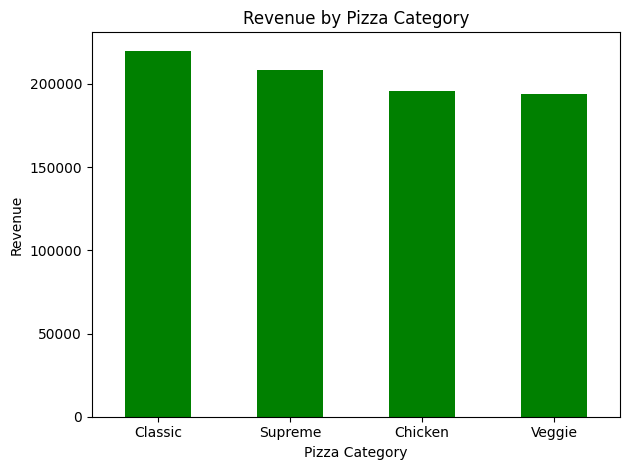

In [36]:
#Revenue by Pizza Category
category_analysis['revenue_per_category'].plot(kind='bar', color='green')
plt.xlabel('Pizza Category')
plt.ylabel('Revenue')
plt.title('Revenue by Pizza Category')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

In [29]:
#Avg unit price and revenue of pizza across different sizes
size_analysis = pizza_sales.groupby('pizza_size').agg(
    avg_unit_price = ('unit_price','mean'),
    revenue_per_category = ('unit_price', lambda x:(x * pizza_sales['quantity']).sum())
).sort_values(by='revenue_per_category',ascending=False)
print("Average Unit Price and Revenue by Sizes:\n", size_analysis)

Average Unit Price and Revenue by Sizes:
             avg_unit_price  revenue_per_category
pizza_size                                      
L                19.802553             375318.70
M                15.951219             249382.25
S                12.364328             178076.50
XL               25.500000              14076.00
XXL              35.950000               1006.60


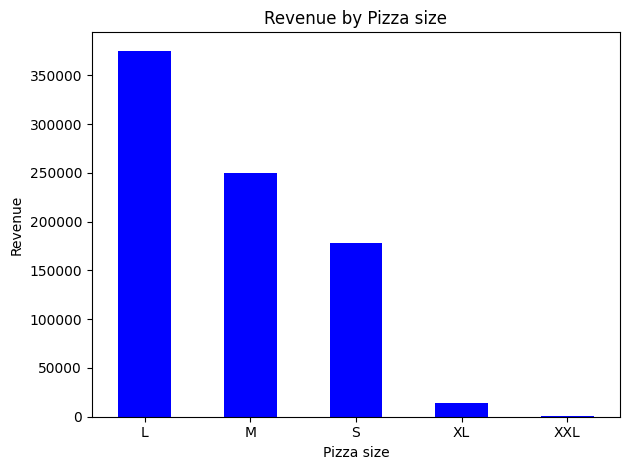

In [33]:
#Revenue by Pizza Size
size_analysis['revenue_per_category'].plot(kind='bar', color='blue')
plt.xlabel('Pizza size')
plt.ylabel('Revenue')
plt.title('Revenue by Pizza size')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

In [39]:
#Average unit price and revenue of most sold 5 pizzas
top_5_analysis = pizza_sales.groupby('pizza_name').agg(
    average_unit_price = ('unit_price','mean'),
    revenue_per_pizza = ('unit_price', lambda x: (x * pizza_sales['quantity']).sum())
).nlargest(5, 'revenue_per_pizza')
print("Average Unit Price and Revenue of Top 5 Pizzas:\n", top_5_analysis)

Average Unit Price and Revenue of Top 5 Pizzas:
                               average_unit_price  revenue_per_pizza
pizza_name                                                         
The Thai Chicken Pizza                 18.286069           43434.25
The Barbecue Chicken Pizza             17.572934           42768.00
The California Chicken Pizza           17.448523           41409.50
The Classic Deluxe Pizza               15.575952           38180.50
The Spicy Italian Pizza                18.104663           34831.25


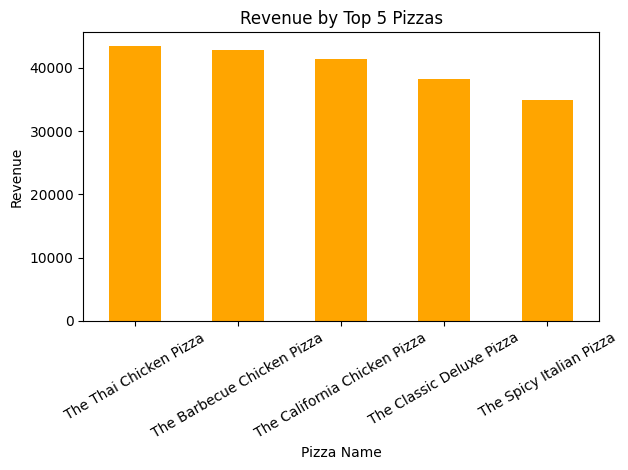

In [54]:
#Revenue by Top 5 Pizza 
top_5_analysis['revenue_per_pizza'].plot(kind='bar', color='orange')
plt.xlabel('Pizza Name')
plt.ylabel('Revenue')
plt.title('Revenue by Top 5 Pizzas')
plt.xticks(fontsize=10,rotation=30)
plt.tight_layout()
plt.show()

In [82]:
#Customer behaviour
favorite_pizza = pizza_sales.groupby(['pizza_name', 'pizza_size'])['order_id'].count().idxmax()
print("Favorite Pizza:", favorite_pizza)

Favorite Pizza: ('The Big Meat Pizza', 'S')


In [84]:
most_ordered = pizza_sales.groupby('pizza_name').agg(
    order_count = ('order_id','count'),
    average_unit_price = ('unit_price','mean')
).nlargest(5, 'order_count')
print("Most Ordered Pizzas:\n", most_ordered)

Most Ordered Pizzas:
                             order_count  average_unit_price
pizza_name                                                 
The Classic Deluxe Pizza           2416           15.575952
The Barbecue Chicken Pizza         2372           17.572934
The Hawaiian Pizza                 2370           13.317194
The Pepperoni Pizza                2369           12.468658
The Thai Chicken Pizza             2315           18.286069


In [85]:
preferred_pizza_size = pizza_sales.groupby('pizza_size').agg(
    order_count=('order_id', 'count'),
    average_unit_price=('unit_price', 'mean')
).nlargest(1, 'order_count')
print("Preferred Pizza Size:\n", preferred_pizza_size)

Preferred Pizza Size:
             order_count  average_unit_price
pizza_size                                 
L                 18526           19.802553


In [86]:
preferred_pizza_category = pizza_sales.groupby('pizza_category').agg(
    order_count=('order_id', 'count'),
    average_unit_price=('unit_price', 'mean')
).nlargest(1, 'order_count')
print("Preferred Pizza Category:\n", preferred_pizza_category)

Preferred Pizza Category:
                 order_count  average_unit_price
pizza_category                                 
Classic               14579            14.79749
